<a href='http://moncoachdata.com'><img src= 'https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/MonCoachData.jpg' width=400/></a>


---


<center><em>Copyright MonCoachData (tous droits réservés)</em></center>
<center><em>Pour plus d'informations, visitez notre site <a href='http://moncoachdata.com'>moncoachdata.com</a></em></center>



---

# Arbres de décision

## Les Données

Nous utiliserons le même jeu de données dans le cadre de nos discussions sur la classification avec des méthodes arborescentes (Decision Tree, Random Forests et Gradient Boosted Trees) afin de comparer les mesures de performance de ces modèles connexes.

Nous travaillerons avec le jeu de données "Palmer Penguins", car il est suffisamment simple pour nous aider à comprendre comment la modification des hyper-paramètres peut changer les résultats de la classification.


<img src="https://moncoachdata.com/wp-content/uploads/MonCoachData-cours/penguin.jpg" width=400>

Les données ont été recueillies et mises à disposition par le Dr Kristen Gorman et la station Palmer, Antarctica LTER, membre du réseau de recherche écologique à long terme.

Gorman KB, Williams TD, Fraser WR (2014) Dimorphisme sexuel écologique et variabilité environnementale au sein d'une communauté de manchots de l'Antarctique (genre Pygoscelis). PLoS ONE 9(3) : e90081. doi:10.1371/journal.pone.0090081

Résumé :
Le dossier de données contient deux fichiers CSV. Pour les cours d'introduction/exemples, vous voudrez probablement utiliser le premier (penguins_size.csv).

* penguins_size.csv : Données simplifiées à partir de jeux de données originaux sur les manchots. Contient des variables :

    * species : espèce de pingouin (Chinstrap = à jugulaire, Adélie, ou Gentoo)
    * culmen_length_mm : longueur du culmen (mm)
    * culmen_depth_mm : profondeur du culmen (mm)
    * flipper_length_mm : longueur de la nageoire (mm)
    * body_mass_g : masse corporelle (g)
    * island : nom de l'île (Dream, Torgersen, ou Biscoe) dans l'archipel de Palmer (Antarctique).
    * sex : sexe du pingouin

* (Non utilisé) penguins_lter.csv : Données d'origine combinées pour 3 espèces de pingouins  

Note : Le culmen est "la crête supérieure du bec d'un oiseau". 

**Notre objectif est de créer un modèle permettant de prédire l'espèce d'un manchot sur la base d'attributs physiques, puis d'utiliser ce modèle pour aider les chercheurs à classer les manchots sur le terrain, sans avoir besoin d'un biologiste expérimenté**.

## Importations et Lecture

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("penguins_size.csv")

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Analyse Exploratoire de Données (EDA)

### Données manquantes

Rappelez-vous que le but est de créer un modèle pour une utilisation future, donc les points de données manquant d'informations cruciales ne nous aideront pas dans cette tâche, d'autant plus que pour les points de données futurs, nous supposerons que la recherche saisira les informations de Features pertinentes.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
# Quel pourcentage allons-nous supprimer ?
100*(10/344)

2.9069767441860463

In [ ]:
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [ ]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [ ]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [ ]:
df = df[df['sex']!='.']

## Visualisation des données

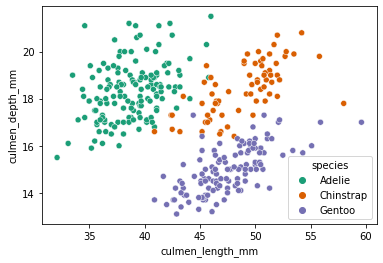

In [ ]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', data=df, hue='species', palette='Dark2');

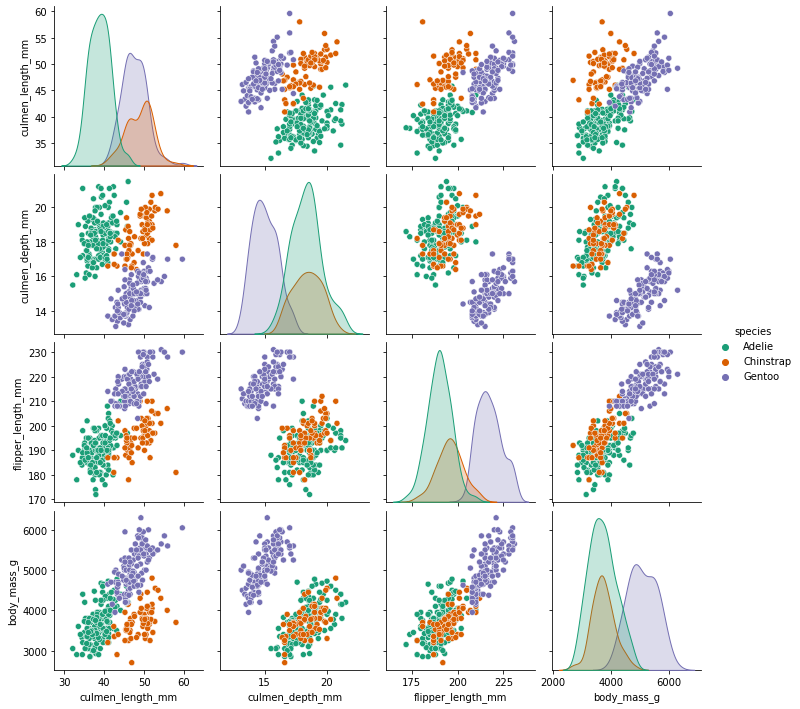

In [ ]:
sns.pairplot(df, hue='species', palette='Dark2');

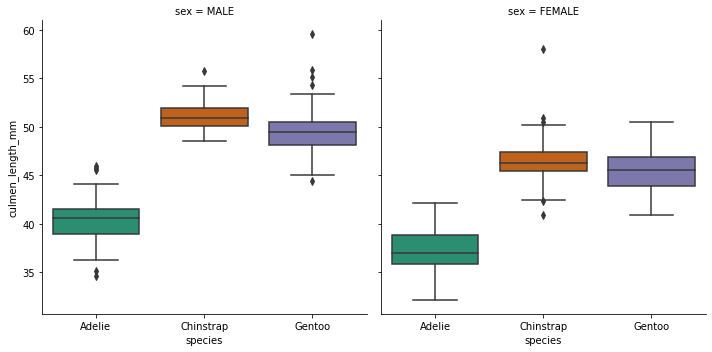

In [ ]:
sns.catplot(x='species', y='culmen_length_mm', data=df,kind='box', col='sex', palette='Dark2');

## Feature Engineering

In [ ]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [ ]:
pd.get_dummies(df.drop('species', axis=1), drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## Fractionnement Entraînement | Test

In [ ]:
X = pd.get_dummies(df.drop('species', axis=1), drop_first=True)
y = df['species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Classificateur à arbre de décision


## Hyper-paramètres par défaut

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state=101)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [ ]:
base_pred = model.predict(X_test)

## Évaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [ ]:
confusion_matrix(y_test, base_pred)

array([[39,  1,  0],
       [ 3, 24,  0],
       [ 1,  0, 32]])

In [ ]:
confusion_matrix(y_test, base_pred)

array([[39,  1,  0],
       [ 3, 24,  0],
       [ 1,  0, 32]])

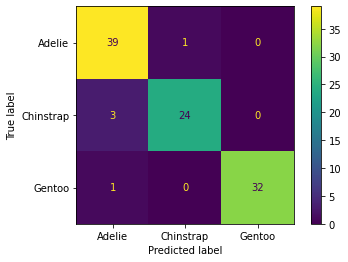

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [ ]:
print(classification_report(y_test, base_pred))

              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        40
   Chinstrap       0.96      0.89      0.92        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100



In [ ]:
model.feature_importances_

array([0.34035881, 0.02010577, 0.57575804, 0.        , 0.03806069,
       0.        , 0.02571668])

In [ ]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.340359
culmen_depth_mm,0.020106
flipper_length_mm,0.575758
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.025717


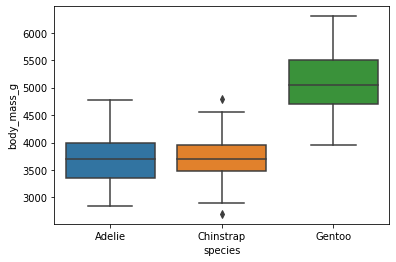

In [ ]:
sns.boxplot(x='species', y='body_mass_g', data=df);

## Visualisation de l'arbre

Cette fonction est relativement nouvelle, vous pouvez consulter la documentation en ligne.

Documentation en ligne : https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [ ]:
from sklearn.tree import plot_tree

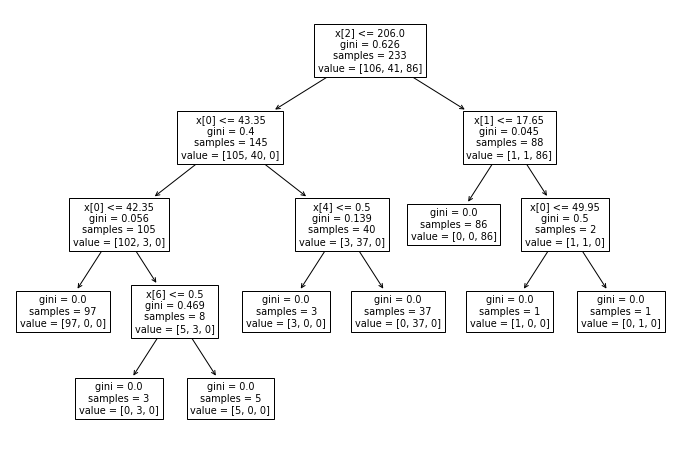

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(model);

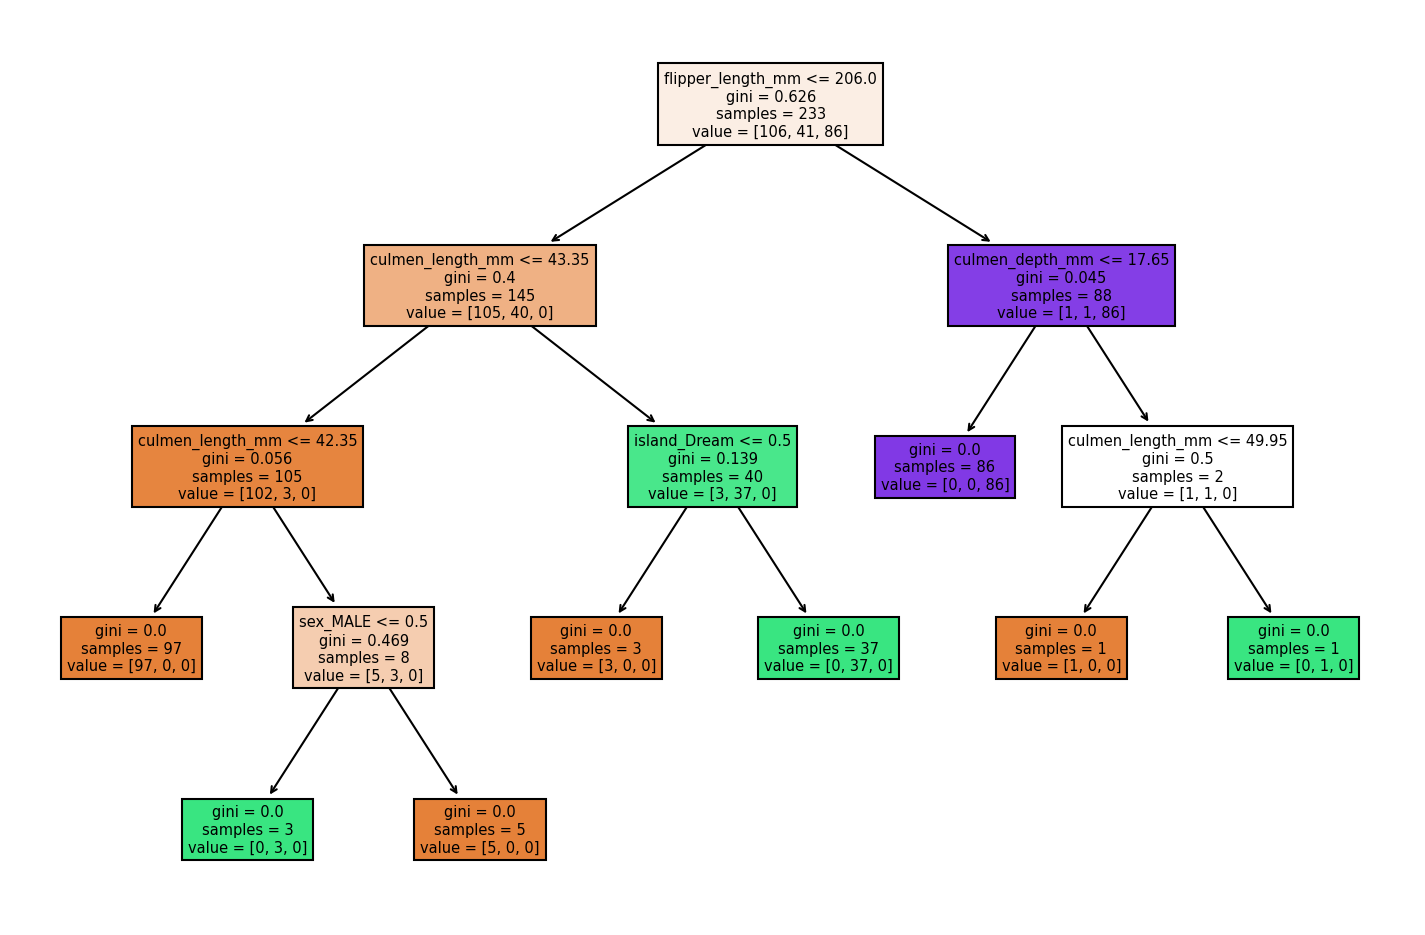

In [ ]:
plt.figure(figsize=(12,8), dpi=150)
plot_tree(model, filled=True, feature_names=X.columns);

## Rapport des résultats du modèle

Pour commencer à expérimenter avec les hyper-paramètres, créons une fonction qui rapporte les résultats de la classification et trace l'arbre.

In [ ]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test, model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model, filled=True, feature_names=X.columns);

## Compréhension des hyper-paramètres


### Max Depth

In [ ]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to 

In [ ]:
pruned_tree = DecisionTreeClassifier(max_depth=2, random_state=101)
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=101)

              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100





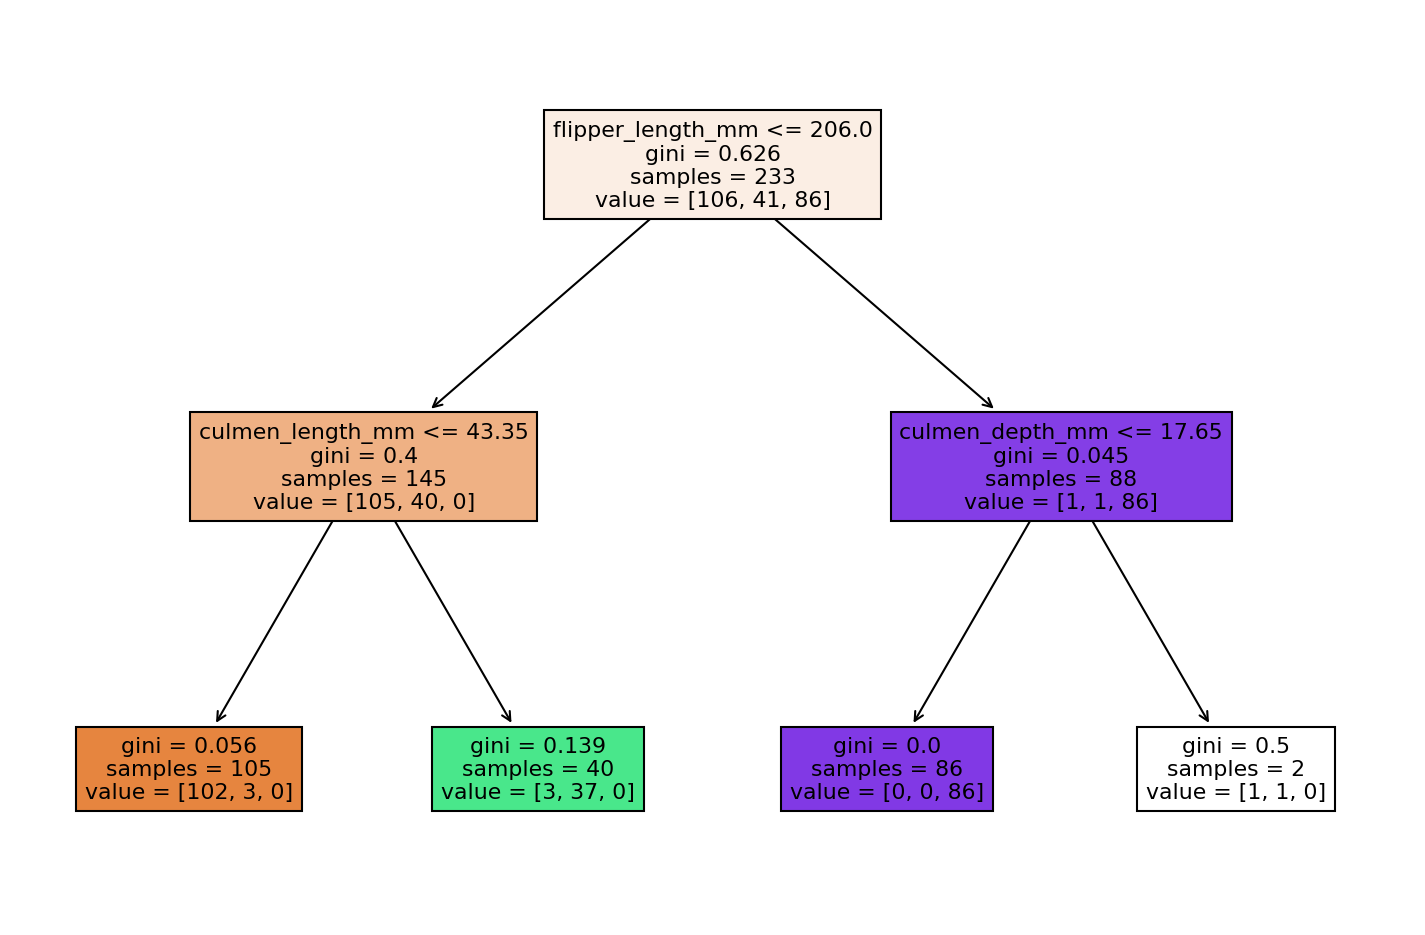

In [ ]:
report_model(pruned_tree)

### Max Leaf Nodes

In [ ]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3, random_state=101)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3, random_state=101)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100





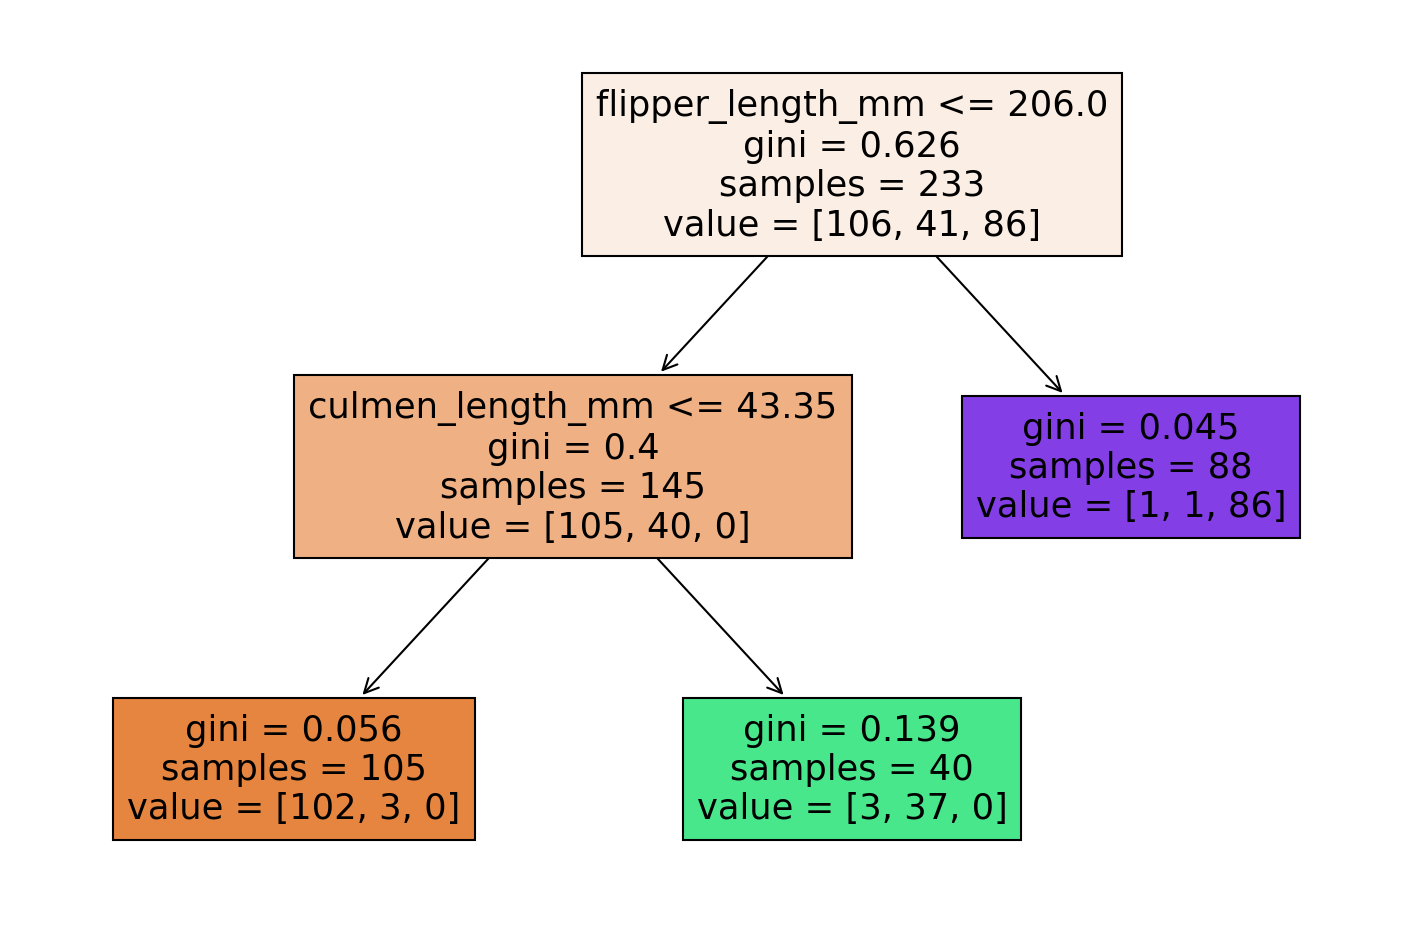

In [ ]:
report_model(pruned_tree)

### Criterion

In [ ]:
entropy_tree = DecisionTreeClassifier(criterion='entropy', random_state=101)
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.93      0.96      0.95        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100





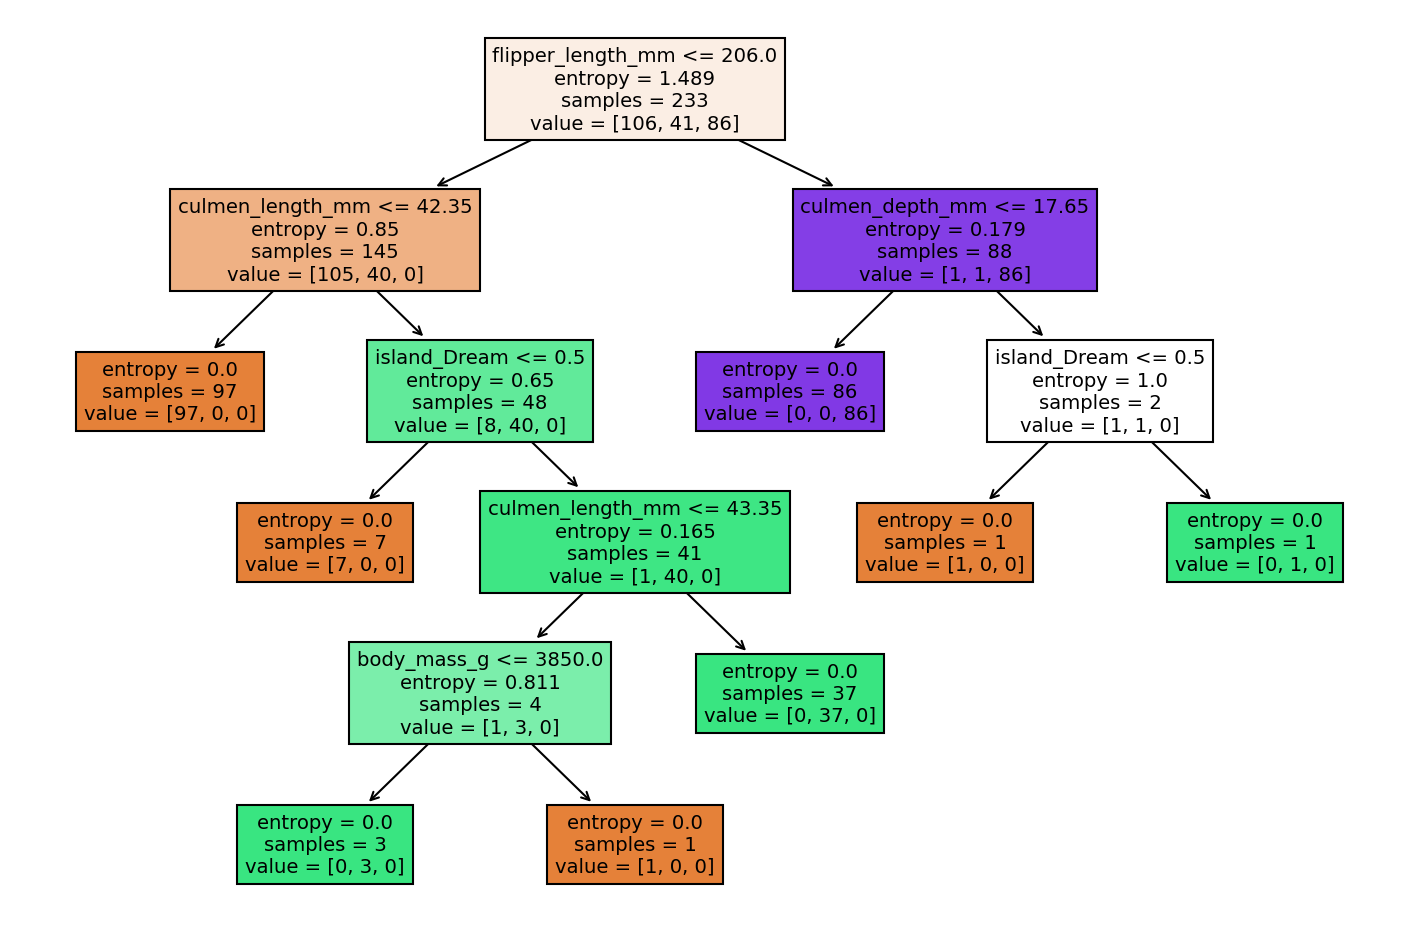

In [ ]:
report_model(entropy_tree)